In [1]:
import pandas as pd
import numpy as np
from scipy import stats, integrate
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline

In [2]:
def read_loan(path,fn):
    df=pd.DataFrame(pd.read_table(path+"\\"+fn+".txt"))
    df.columns = ['CUW_APPLICATION_NUM',
'Fltr_MI_Eligibility',
'LTV_RAT',
'ProcessTimeMinutes',
'MISMO_Property_Usage_Cd',
'INVESTOR_NAM',
'mismo_loan_purpose_cd',
'Borrower_No',
'FICO',
'FirstDecisionDocCount']
    return df

In [3]:
df=read_loan("C:\\Users\\wliu\\Desktop","CUW_Data")
df.head()

,CUW_APPLICATION_NUM,Fltr_MI_Eligibility,LTV_RAT,ProcessTimeMinutes,MISMO_Property_Usage_Cd,INVESTOR_NAM,mismo_loan_purpose_cd,Borrower_No,FICO,FirstDecisionDocCount
0,18009550,0,0.43,152.0,PRI,FANNIE MAE,PUR,1,660,22.0
1,18009551,1,0.95,51.0,PRI,FANNIE MAE,PUR,1,724,28.0
2,18009552,0,0.80,114.0,PRI,TBI MORTGAGE COMPANY,PUR,2,808,24.0
3,18009553,0,0.80,110.0,PRI,FANNIE MAE,PUR,2,781,20.0
4,18009554,0,0.75,135.0,PRI,TBI MORTGAGE COMPANY,PUR,1,780,33.0


In [4]:
#check any column with NAN value
df.isnull().any()

CUW_APPLICATION_NUM        False
Fltr_MI_Eligibility        False
LTV_RAT                    False
ProcessTimeMinutes          True
MISMO_Property_Usage_Cd    False
INVESTOR_NAM                True
mismo_loan_purpose_cd      False
Borrower_No                False
FICO                       False
FirstDecisionDocCount       True
dtype: bool

In [5]:
df.shape

(30241, 10)

In [6]:
df = df.dropna(axis=0,subset=['ProcessTimeMinutes','INVESTOR_NAM','FirstDecisionDocCount'])
df.shape

(29561, 10)

In [7]:
df.dtypes

CUW_APPLICATION_NUM          int64
Fltr_MI_Eligibility          int64
LTV_RAT                    float64
ProcessTimeMinutes         float64
MISMO_Property_Usage_Cd     object
INVESTOR_NAM                object
mismo_loan_purpose_cd       object
Borrower_No                  int64
FICO                         int64
FirstDecisionDocCount      float64
dtype: object

In [8]:
def f2(row):
    if row['FICO'] <=630 :
        val = 630
    elif 630< row['FICO'] <=650:
        val = 650
    elif 650< row['FICO'] <=670:
        val = 670
    elif 670< row['FICO'] <=690:
        val = 690
    elif 690< row['FICO'] <=710:
        val = 710
    elif 710< row['FICO'] <=730:
        val = 730
    elif 730< row['FICO'] <=750:
        val = 750
    elif 750< row['FICO'] <=770:
        val = 770
    elif 770< row['FICO'] <=790:
        val = 790
    else:
        val =800
    return val

df['FICO_new'] = (df.apply(f2, axis=1))

In [9]:
df = df[(df.ProcessTimeMinutes<=180)]
df.shape

(25292, 11)

**FICO**

In [10]:
(df.groupby('FICO_new').CUW_APPLICATION_NUM.nunique()/df.CUW_APPLICATION_NUM.nunique())\
.mul(100).round(1).astype(str) + '%'

FICO_new
630     0.4%
650     1.2%
670     2.1%
690     3.9%
710     6.6%
730     8.6%
750    10.3%
770    14.0%
790    20.2%
800    32.7%
Name: CUW_APPLICATION_NUM, dtype: object

**Property Usage**

In [11]:
(df.groupby('MISMO_Property_Usage_Cd').CUW_APPLICATION_NUM.nunique()/df.CUW_APPLICATION_NUM.nunique())\
.mul(100).round(1).astype(str) + '%'

MISMO_Property_Usage_Cd
INVST     3.3%
PRI      94.2%
SEC       2.5%
Name: CUW_APPLICATION_NUM, dtype: object

**Borrower Number**

In [12]:
(df.groupby('Borrower_No').CUW_APPLICATION_NUM.nunique()/df.CUW_APPLICATION_NUM.nunique())\
.mul(100).round(1).astype(str) + '%'

Borrower_No
1    52.6%
2    47.0%
3     0.4%
4     0.0%
5     0.0%
Name: CUW_APPLICATION_NUM, dtype: object

**Loan Purpose**

In [13]:
(df.groupby('mismo_loan_purpose_cd').CUW_APPLICATION_NUM.nunique()/df.CUW_APPLICATION_NUM.nunique())\
.mul(100).round(1).astype(str) + '%'

mismo_loan_purpose_cd
CONPA     0.0%
CONPR     0.0%
PUR      46.1%
REF      50.0%
UNK       3.9%
Name: CUW_APPLICATION_NUM, dtype: object

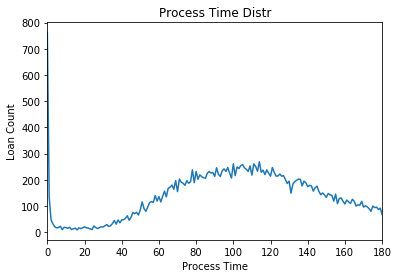

In [14]:
ProcessTime_distri = df[(df.ProcessTimeMinutes<=300)].groupby('ProcessTimeMinutes').CUW_APPLICATION_NUM.nunique().sort_index()
ProcessTime_distri.plot(kind = 'line', title = 'Process Time Distr').set(xlabel = 'Process Time', ylabel = 'Loan Count')
plt.show()

In [15]:
df['Pri_Resident'] = np.where(df.MISMO_Property_Usage_Cd=='PRI', 1, 0)
df['Multi_Borrower'] = np.where(df.Borrower_No == 1, 0, 1)
df['Fannie_Flag'] = np.where(df.INVESTOR_NAM == 'FANNIE MAE', 1, 0)
df['Purchase_Flag'] = np.where(df.mismo_loan_purpose_cd == 'PUR', 1, 0)

** Explore Process Time vs. FICO Score, LTV, Doc Count etc **

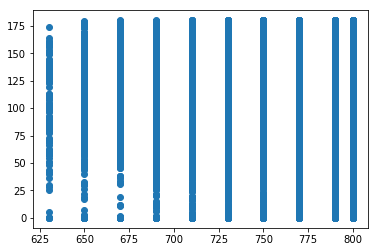

In [16]:
plt.scatter(df.FICO_new, df.ProcessTimeMinutes)

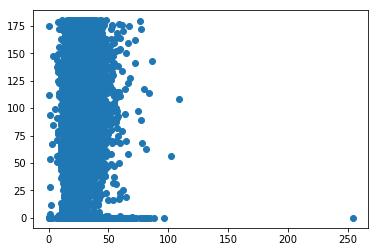

In [17]:
plt.scatter(df.FirstDecisionDocCount, df.ProcessTimeMinutes)

In [18]:
df.head()

,CUW_APPLICATION_NUM,Fltr_MI_Eligibility,LTV_RAT,ProcessTimeMinutes,MISMO_Property_Usage_Cd,INVESTOR_NAM,mismo_loan_purpose_cd,Borrower_No,FICO,FirstDecisionDocCount,FICO_new,Pri_Resident,Multi_Borrower,Fannie_Flag,Purchase_Flag
0,18009550,0,0.43,152.0,PRI,FANNIE MAE,PUR,1,660,22.0,670,1,0,1,1
1,18009551,1,0.95,51.0,PRI,FANNIE MAE,PUR,1,724,28.0,730,1,0,1,1
2,18009552,0,0.80,114.0,PRI,TBI MORTGAGE COMPANY,PUR,2,808,24.0,800,1,1,0,1
3,18009553,0,0.80,110.0,PRI,FANNIE MAE,PUR,2,781,20.0,790,1,1,1,1
4,18009554,0,0.75,135.0,PRI,TBI MORTGAGE COMPANY,PUR,1,780,33.0,790,1,0,0,1


In [40]:
X = pd.concat([df.iloc[:,1:3], df.iloc[:,9:16]], axis = 1).values
y = df.iloc[:,3].values

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [42]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

** Algorithm 1 - Linear Regression **

In [43]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred

array([ 102.51393051,  100.2981739 ,  101.90379277, ...,  112.1313458 ,
        104.70969576,  101.46609631])

In [45]:
y_test

array([  86.,   14.,   42., ...,  125.,   98.,  107.])

** 3 Metrics to Evaluate Regression **
- MAE (Mean Absolute Error)
- MSE (Mean Squre Error)
- R Square

In [58]:
#MAE
from sklearn.model_selection import cross_val_score
scoring = 'neg_mean_absolute_error'
results = cross_val_score(regressor, X_train, y_train, cv=10, scoring=scoring)
print(("MAE: %.3f (%.3f)") % (results.mean(), results.std()))

MAE: -32.598 (0.628)


In [59]:
#MSE
scoring = 'neg_mean_squared_error'
results = cross_val_score(regressor, X_train, y_train, cv=10, scoring=scoring)
print(("MSE: %.3f (%.3f)") % (results.mean(), results.std()))

MSE: -1669.794 (63.380)


In [52]:
# RMSE
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(y_test, y_pred)))

41.5944139686


In [67]:
# R Square
from sklearn.metrics import r2_score
results = r2_score(y_test,y_pred)
results

0.018729859296556794

** Algorithm 2 - Polynomial Regression **

In [70]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg1 = PolynomialFeatures(degree = 2)
X_poly = poly_reg1.fit_transform(X)

In [72]:
X_poly.shape

(25292, 55)

In [74]:
X.shape

(25292, 9)

## Feature Selection

In [46]:
# Building the optimal optimal using backward elimination
import statsmodels.formula.api as sm
# append Xo = 1 column
X = np.append(arr = np.ones((25292,1)).astype(int), values = X, axis = 1)
X_opt = X[:,[0,1,2,3,4,5,6,7]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     55.48
Date:                Mon, 11 Sep 2017   Prob (F-statistic):           3.11e-79
Time:                        14:51:30   Log-Likelihood:            -1.2984e+05
No. Observations:               25292   AIC:                         2.597e+05
Df Residuals:                   25284   BIC:                         2.598e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        141.9617      5.743     24.717      0.000       130.704   153.219
x1             8.7612      0.724     12.093      0.000         7.341    10.181
x2            -1.1900      1.908     -0.624      0.533        -4.931     2.551
x3            -0.2337      0.038     -6.118      0.000        -0.309    -0.159
x4            -0.0411      0.007     -5.929      0.000        -0.055    -0.027
x5            -6.9814      1.115     -6.264      0.000        -9.166    -4.797
x6             5.4926      0.536     10.254      0.000         4.443     6.543
x7            -0.4687      0.571     -0.821      0.412        -1.588     0.651
==============================================================================
Omnibus:                      670.290   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              724.187
Skew:                          -0.414   Prob(JB):                    5.56e-158
Kurtosis:                       2.946   Cond. No.                     1.72e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
# remove the feature with the highest P, and then rerun
X_opt = X[:,[0,1,3,4,5,6]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     77.47
Date:                Mon, 11 Sep 2017   Prob (F-statistic):           6.69e-81
Time:                        14:51:39   Log-Likelihood:            -1.2984e+05
No. Observations:               25292   AIC:                         2.597e+05
Df Residuals:                   25286   BIC:                         2.597e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        140.5620      5.502     25.546      0.000       129.777   151.347
x1             8.4408      0.542     15.565      0.000         7.378     9.504
x2            -0.2331      0.038     -6.104      0.000        -0.308    -0.158
x3            -0.0404      0.007     -5.863      0.000        -0.054    -0.027
x4            -6.9817      1.114     -6.265      0.000        -9.166    -4.797
x5             5.4852      0.536     10.241      0.000         4.435     6.535
==============================================================================
Omnibus:                      669.917   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              723.767
Skew:                          -0.414   Prob(JB):                    6.86e-158
Kurtosis:                       2.947   Cond. No.                     1.64e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""